## Lista 1
### Professor: Bruno Pimentel
### Aluno: Gustavo de Melo Oliveira

1. Qual a diferença entre Big Data e Ciência de Dados? (0,5 ponto)

    Big data: Grande volume de dados.
    Ciência de Dados: Lida com criação de soluções a partir de big data.

2. De que forma Estatística, Mineração de Dados e Aprendizagem de Máquina interagem com Ciência de Dados? (1 ponto)

    Todo o fluxo desde a aquisição de dados, limpeza de dados, transformações, aprendizado de máquina e utilização de métodos estatístico podemos dizer que é mineração de dados, a ciência de dados utiliza de todas as técnicas de mineração para gerar algum valor e tomar decisões.

3. Mostre a importância do conhecimento de domínio para o cientista de dados. (0,5 ponto)

    Além de todo o conhecimento que um Cientista de Dados tem, no mercado de trabalho deve possuir o conhecimento do négocio da empresa que atua para conseguir gerar valor com os seus dados. 

4. Crie um conjunto de dados com duas variáveis V1 e V2, tal que:
    - Mediana de V1 < Média de V1 (0,5 ponto)
    - Mediana de V2 > Média de V2 (0,5 ponto)

In [1]:
import numpy as np

SEED = 5
np.random.seed(SEED)

array1 = np.random.randint(2, 60, 500)    
array2 = np.random.randint(2, 20, 500)
v1 = np.concatenate((array1, array2))

array1 = np.random.randint(1, 10, 500)
array2 = np.random.randint(9, 10, 500)
v2 = np.concatenate((array1, array2))

dict_ = {
    'V1': v1,
    'V2': v2
}

print('V1\n\nmean: {mean}\nmedian: {median}\n'\
      .format(mean = np.mean(dict_['V1']), 
              median = np.median(dict_['V1'])
             )
     )
print('V2\n\nmean: {mean}\nmedian: {median}\n'\
      .format(mean = np.mean(dict_['V2']), 
              median = np.median(dict_['V2'])
             )
     )

V1

mean: 19.787
median: 15.0

V2

mean: 6.934
median: 9.0



5. Baseando-se no conjunto de dados criado na questão 4, crie uma função em Python que:
    - Mostra o histograma de cada variável; (1 ponto)
    - Verifica se as variáveis seguem uma distribuição Normal (use teste de hipótese) (1 ponto)


Hipóteses
H0: Os dados seguem uma distruibção normal.
H1: Os dados não seguem uma distruição normal.
*********************************************

Com 95% de confiança:


Variável V1:

A amostra não segue uma distribuição normal.


Variável V2:

A amostra não segue uma distribuição normal.



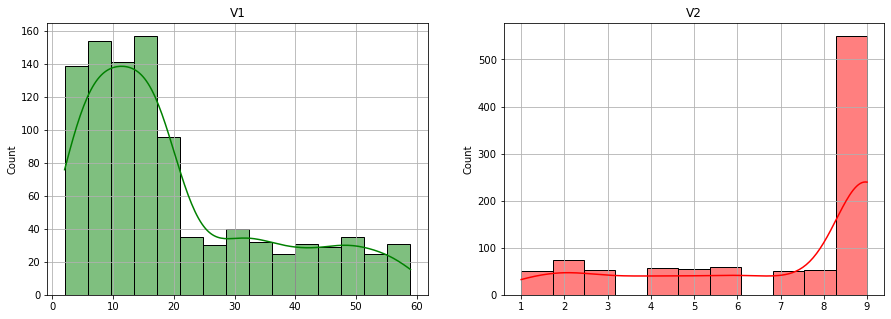

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

def function_1(df):
    
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    sns.histplot(df['V1'], ax= axs[0], kde=True, color='g')
    axs[0].grid(True)
    axs[0].set_title('V1')

    sns.histplot(df['V2'], ax= axs[1], kde=True, color='r')
    axs[1].grid(True)
    axs[1].set_title('V2')
    
    print('\nHipóteses')
    print('H0: Os dados seguem uma distruibção normal.')
    print('H1: Os dados não seguem uma distruição normal.')
    print('*********************************************\n')
    
    conf = 0.05
    print('Com 95% de confiança:\n')
    
    _, pvalue = shapiro(df['V1'])
    if pvalue > conf:
        print('\nVariável V1:\n\nA amostra segue uma distribuição normal.\n')
    else:
        print('\nVariável V1:\n\nA amostra não segue uma distribuição normal.\n')
    
    _, pvalue = shapiro(df['V2'])
    if pvalue > conf:
        print('\nVariável V2:\n\nA amostra segue uma distribuição normal.\n')
    else:
        print('\nVariável V2:\n\nA amostra não segue uma distribuição normal.\n')
        
function_1(dict_)

6. Cite 2 técnicas para remoção de ruídos e, para cada uma, mostre uma vantagem e uma desvantagem. (1 ponto)

    Z-Score:
        Prós: Método muito eficaz uando consegue descrever que as variáveis segue uma distribuição gaussiana. (Paramétrico)
        Contra: Conveniente usar somente quando se possui uma baixa dimensionalidade e em conjuntos de dados de pequenos a médio porte.
    Clusterização (DBSCAN):
        Prós: Alta eficiencias quando não conseguimos assumir a distribuição das variáveis.
        Contra: Modelo não supervisionado e precisa ser recalibrado cada vez que um novo lote de dados é adicionado.

Utilizando clusterização:

7. Qual é a importância de utilizar as seguintes abordagens de redução de dados no contexto de Ciência dos Dados?
    - Redução de dimensionalidade (0,5 ponto)
    - Redução de numerosidade (0,5 ponto)

    Redução de dimensionalidade: Evitamos overfitting, aumento do desempenho do modelo, menor tempo de treinamento, conseguimos reduzir os ruídos dos dados.
    
    Redução de numerosidade: Alternativa de respresentação para dados menores, conseguimos representar de forma paramétrica, quando temos um parametro para representar nosso dado ou não paramétrica com agrupamento e amostragem.

8. De que forma pode-se detectar overfitting em um classificador? (0,5 ponto)

    Quando o modelo consegue prever ou se ajustar muito bem os dados que foram usados para treiná-lo, mas ele não consegue generalizar com dados que nunca foram vistos. Temos um trade-off entre viés e variância, onde a variância aumenta e o viés cai constatemente.

9. Em quais tipos de problemas é preferível utilizar leave-one-out a utilizar  K-fold cross-validation? (0,5 ponto)

    Leave-one-out: Preferivél para conjuntos de dados pequenos, pois k equivale a quantidade de dados, tendo assim um alto custo computacional.
    
    K-fold cross-validation: Divide os dados em k - sub conjuntos, preferível para conjuntos de dados maiores. 

10. Crie um script em Python que avalie a diferença de desempenho do classificador K-NN e Naive Bayes para o conjunto de dados Iris (https://archive.ics.uci.edu/ml/datasets/iris). Use F-measure e K-fold cross-validation. (2 pontos)

In [7]:
import pandas as pd
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [8]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [9]:
models = [
          ('NayveBayes', GaussianNB()),
          ('KNN', KNeighborsClassifier())
          ]

In [10]:
original = pd.DataFrame()

for name, model in tqdm(models):
    

    kfold = KFold(n_splits=10, random_state=SEED, shuffle=True)
    score = cross_validate(model, df.iloc[:,:4], df.iloc[:,-1], cv=kfold, scoring=['f1_micro'], return_train_score=True)        
    additional = pd.DataFrame({
        'f1_train':np.mean(score['train_f1_micro']),
        'f1_test':np.mean(score['test_f1_micro']),
    }, index=[name])

    new = pd.concat([original, additional], axis=0)
    original = new

100%|██████████| 2/2 [00:00<00:00,  4.62it/s]


In [11]:
original

,f1_train,f1_test
NayveBayes,0.96000,0.953333
KNN,0.96963,0.960000


100%|██████████| 2/2 [00:00<00:00,  9.80it/s]


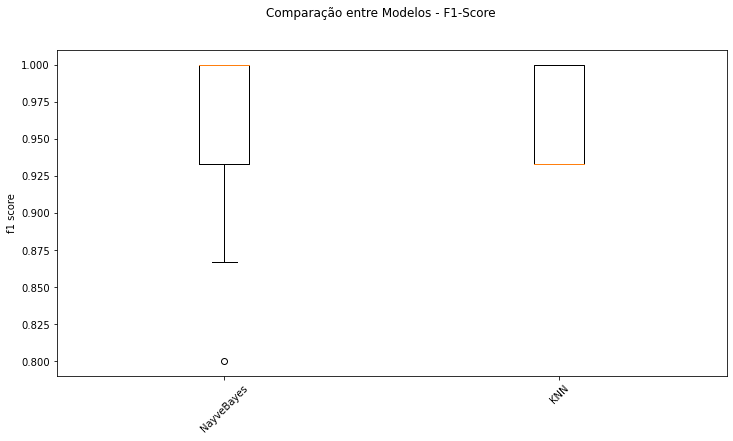

In [12]:
results = []
names = []

for name, model in tqdm(models):
    cv_results = cross_val_score(model, df.iloc[:,:4], df.iloc[:,-1], cv=kfold, scoring=('f1_micro'))
    results.append(cv_results)
    names.append(name)

fig = plt.figure(figsize=(12,6))
fig.suptitle('Comparação entre Modelos - F1-Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('f1 score')
plt.xticks(rotation=45)
plt.grid(b=False)
plt.show()